In [312]:
# Profitability for genre/box office 


# Dependencies

import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

In [313]:
# Import data from .txt file

with open('movie_data.txt') as json_file:
    data1 = json.load(json_file)

data = {}
for x in list(data1.keys()):
    data[x]=data1[x]

In [314]:
# Extract and sort genre information

genres = {}
genre_list = []
genre_list_all = []
genre_box = {}

for year in list(data.keys()):
    movies = list(data[year].keys())
    genre_list = []
    boxes = []
    for movie in movies:
        try:
            genre = data[year][movie]['Genre'].split(', ')
            box = data[year][movie]['BoxOffice']
            box_vals=[]
            for i in genre:
                genre_list.append(i)
                boxes.append(box)
                genre_list_all.append(i)
                
        except Exception as e:
            print(str(e)+" Year: "+year+" Movie: "+movie)
    genres[year] = genre_list
    genre_box[year] = boxes

g_df={}
for year in list(data.keys()):
    gbox={}
    for i in range(len(genre_box[year])):
        
        if genres[year][i] not in list(gbox.keys()):
            gbox[genres[year][i]] = [genre_box[year][i]]
        else:
            gbox[genres[year][i]].append(genre_box[year][i])
    g_df[year] = gbox

for y in list(g_df.keys()):
    for g in list(g_df[y].keys()):
        g_df[y][g] = {'box_total': sum(g_df[y][g]),
                      'movie_genre_count': len(g_df[y][g]),
                      'box_per_movie': sum(g_df[y][g])/len(g_df[y][g])}

# Example
g_df['2015']
        
# g_df is a dictionary that contains all genre data sorted by year

{'Action': {'box_total': 4255852950,
  'movie_genre_count': 17,
  'box_per_movie': 250344291.17647058},
 'Adventure': {'box_total': 5356091804,
  'movie_genre_count': 21,
  'box_per_movie': 255051990.66666666},
 'Sci-Fi': {'box_total': 2883727771,
  'movie_genre_count': 8,
  'box_per_movie': 360465971.375},
 'Animation': {'box_total': 1456324664,
  'movie_genre_count': 7,
  'box_per_movie': 208046380.57142857},
 'Comedy': {'box_total': 2696100694,
  'movie_genre_count': 20,
  'box_per_movie': 134805034.7},
 'Thriller': {'box_total': 1207001927,
  'movie_genre_count': 7,
  'box_per_movie': 172428846.7142857},
 'Drama': {'box_total': 1321387590,
  'movie_genre_count': 11,
  'box_per_movie': 120126144.54545455},
 'Family': {'box_total': 824903712,
  'movie_genre_count': 6,
  'box_per_movie': 137483952.0},
 'Fantasy': {'box_total': 279898938,
  'movie_genre_count': 2,
  'box_per_movie': 139949469.0},
 'Music': {'box_total': 250309287,
  'movie_genre_count': 2,
  'box_per_movie': 125154643.

In [315]:
# For each genre, list genre revenue per movie for all years

unique_genres = pd.Series(genre_list_all).unique()
unique_genres

box_val_time={}
for i in unique_genres:
    rev = []
    for year in list(g_df.keys()):
        try:
            rev.append(g_df[year][i]['box_per_movie'])
        except:
            rev.append(0)
    box_val_time[i] = rev

# Example
box_val_time['Adventure']

# box_val_time is a dict with keys are unique genres and values are lists of revenue per genre per movie for each year (in order; for plotting values)
box_df = pd.DataFrame(data=box_val_time,index=list(g_df.keys()))
box_df.head()

,Action,Adventure,Fantasy,Comedy,Crime,War,Biography,Drama,Music,Family,...,Sport,Mystery,Thriller,Romance,Musical,Western,Documentary,History,Animation,Short
1980,6.412045e+07,7.614714e+07,5.297134e+07,2.790699e+07,2.676332e+07,69847348.0,28255335.0,2.519037e+07,2.548745e+07,36152994.5,...,31615165.5,2.607170e+07,1.590629e+07,1.627847e+07,21982700.0,15795189.0,5318098.0,0.0,0.0,0.0
1981,2.504513e+07,2.094053e+07,2.939931e+07,3.048123e+07,1.928306e+07,85297000.0,21205635.5,2.239634e+07,2.028612e+06,0.0,...,72179579.0,9.940560e+06,1.936988e+07,2.633093e+07,17464494.5,12617845.0,2028612.0,36027783.0,0.0,0.0
1982,4.637499e+07,4.741717e+07,3.048547e+07,4.072972e+07,3.500450e+07,0.0,0.0,6.321737e+07,2.522983e+07,246084778.5,...,72637557.0,1.903602e+07,4.835242e+07,1.117370e+08,69701637.0,0.0,0.0,0.0,0.0,0.0
1983,7.354119e+07,7.409083e+07,1.631114e+08,3.925984e+07,4.190417e+07,28445927.0,0.0,4.609337e+07,5.778586e+07,0.0,...,17233166.0,3.472500e+07,5.152847e+07,3.339284e+07,14929552.0,0.0,0.0,0.0,0.0,0.0
1984,7.868771e+07,5.271909e+07,9.256174e+07,5.782811e+07,8.573553e+07,19265302.0,0.0,4.569460e+07,4.180017e+07,91077276.0,...,34129652.0,4.427212e+07,4.056223e+07,4.120214e+07,0.0,0.0,0.0,0.0,0.0,0.0


In [316]:
# Establishes year ranges and filters data. 1980-2020, 2000-2020, 2010-2020, 2015-2020
# Aka past 40/20/10/5 year

year_1980 = box_df.loc[box_df.index>='1980']
year_2000 = box_df.loc[box_df.index>='2000']
year_2010 = box_df.loc[box_df.index>='2010']
year_2015 = box_df.loc[box_df.index>='2015']

In [333]:
# Finds the top x genres for the year ranges in question

x = 7

box_sum_40 = year_1980.sum()
box_sum_40 = box_sum_40.sort_values(ascending=False)
top_5_1980 = box_sum_40[:x]
top_5_1980['Other'] = box_sum_40[x:].sum()

box_sum_20 = year_2000.sum()
box_sum_20 = box_sum_20.sort_values(ascending=False)
top_5_2000 = box_sum_20[:x]
top_5_2000['Other'] = box_sum_20[x:].sum()

box_sum_10 = year_2010.sum()
box_sum_10 = box_sum_10.sort_values(ascending=False)
top_5_2010 = box_sum_10[:x]
top_5_2010['Other'] = box_sum_10[x:].sum()

box_sum_5 = year_2015.sum()
box_sum_5 = box_sum_5.sort_values(ascending=False)
top_5_2015 = box_sum_5[:x]
top_5_2015['Other'] = box_sum_5[x:].sum()

In [341]:
# Top X genres each year

top_x={}
for year in list(g_df.keys()):
    box_row = box_df.loc[year]
    top_x[year] = box_row.sort_values(ascending=False)[:x]
top_x_df = pd.DataFrame(data=top_x)

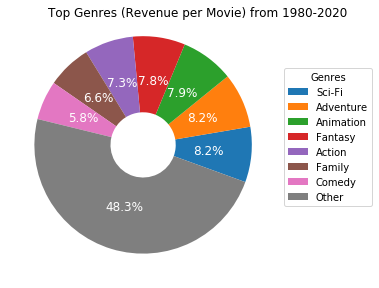

In [318]:
# Plots top revenue producing genres in the past 40 years

fig, ax = plt.subplots(figsize=(6, 5), subplot_kw=dict(aspect="equal"))

wedges, texts, autotexts = ax.pie(top_5_1980,autopct='%1.1f%%',wedgeprops=dict(width=0.7),startangle=-20)
plt.setp(autotexts, size='large',color='white')

ax.legend(top_5_1980.index,title='Genres',bbox_to_anchor=(1,0,0,.8))
ax.set_title("Top Genres (Revenue per Movie) from 1980-2020",y=0.95,x=0.7)

plt.show()

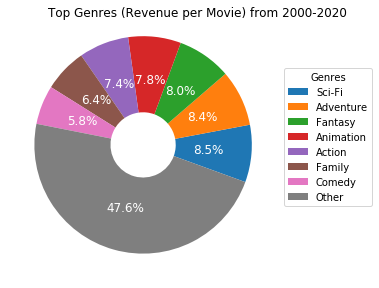

In [319]:
# Plots top revenue producing genres in the past 20 years

fig, ax = plt.subplots(figsize=(6, 5), subplot_kw=dict(aspect="equal"))

wedges, texts, autotexts = ax.pie(top_5_2000,autopct='%1.1f%%',wedgeprops=dict(width=0.7),startangle=-20)
plt.setp(autotexts, size='large',color='white')

ax.legend(top_5_2000.index,title='Genres',bbox_to_anchor=(1,0,0,.8))
ax.set_title("Top Genres (Revenue per Movie) from 2000-2020",y=0.95,x=0.7)

plt.show()

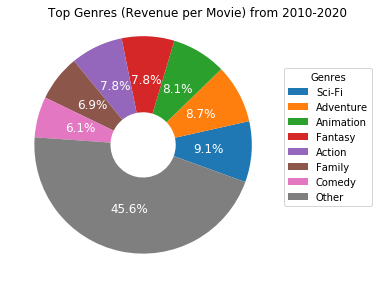

In [320]:
# Plots top revenue producing genres in the past 10 years

fig, ax = plt.subplots(figsize=(6, 5), subplot_kw=dict(aspect="equal"))

wedges, texts, autotexts = ax.pie(top_5_2010,autopct='%1.1f%%',wedgeprops=dict(width=0.7),startangle=-20)
plt.setp(autotexts, size='large',color='white')

ax.legend(top_5_2010.index,title='Genres',bbox_to_anchor=(1,0,0,.8))
ax.set_title("Top Genres (Revenue per Movie) from 2010-2020",y=0.95,x=0.7)

plt.show()

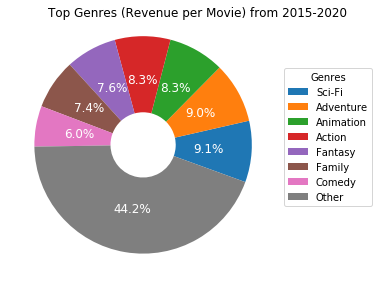

In [321]:
# Plots top revenue producing genres in the past 5 years

fig, ax = plt.subplots(figsize=(6, 5), subplot_kw=dict(aspect="equal"))

wedges, texts, autotexts = ax.pie(top_5_2015,autopct='%1.1f%%',wedgeprops=dict(width=0.7),startangle=-20)
plt.setp(autotexts, size='large',color='white')

ax.legend(top_5_2015.index,title='Genres',bbox_to_anchor=(1,0,0,.8))
ax.set_title("Top Genres (Revenue per Movie) from 2015-2020",y=0.95,x=0.7)

plt.show()

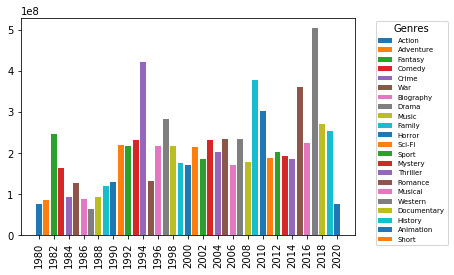

In [335]:
fontP = FontProperties()
fontP.set_size('x-small')
for i in list(top_five.keys()):
    plt.bar(i,top_five[i])
    plt.xticks(np.arange(0, 42, step=2),rotation = 90)
    plt.legend(unique_genres, title='Genres',bbox_to_anchor=(1.05,1),loc='upper left',prop=fontP)

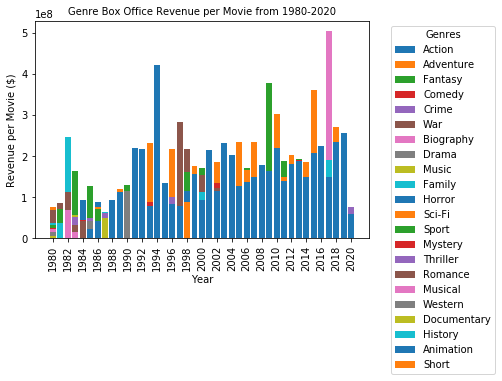

In [327]:
# Plotting genre value

x_vals = list(g_df.keys())
y_vals = []

for g in unique_genres:
    y_vals = box_val_time[g]
    plt.bar(x_vals,y_vals)
#fontP = FontProperties()
#fontP.set_size('xx-small')
plt.xticks(np.arange(0, 42, step=2),rotation = 90)
plt.xlabel('Year')
plt.ylabel('Revenue per Movie ($)')
plt.legend(unique_genres,title='Genres',bbox_to_anchor=(1.05,1),loc='upper left')
plt.title('Genre Box Office Revenue per Movie from 1980-2020',fontsize=10)
plt.show()

In [342]:
# Create DataFrame for genre counts per year (not meaningful when 
# unprocessed due to the fact each year has diff number of movies)

genre_df = {}
genre_stats = {}
for i in list(genres.keys()):
    genre_df[i] = pd.Series(genres[i]).value_counts()
    genre_stats[i] = pd.Series(genres[i])
genre_df = pd.DataFrame(data = genre_df)
genre_stats = pd.DataFrame(data = genre_stats).describe()
genre_df = genre_df.fillna(0)
genre_df.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Action,9.0,9.0,9.0,10.0,15.0,12.0,10.0,9.0,11.0,10.0,...,15.0,21.0,15.0,27.0,17.0,22.0,25.0,20.0,19.0,13.0
Adventure,7.0,10.0,6.0,10.0,11.0,16.0,8.0,6.0,7.0,8.0,...,20.0,26.0,21.0,25.0,21.0,27.0,23.0,22.0,25.0,8.0
Animation,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,1.0,...,9.0,7.0,9.0,7.0,7.0,10.0,8.0,7.0,8.0,2.0
Biography,4.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,2.0,2.0,1.0,2.0,2.0,0.0,2.0,3.0,1.0
Comedy,25.0,20.0,19.0,19.0,23.0,21.0,26.0,27.0,22.0,23.0,...,21.0,18.0,16.0,18.0,20.0,19.0,18.0,18.0,17.0,12.0


In [343]:
# Statistics on genre 

genre_count = genre_stats.loc['count']
top_genres = genre_stats.loc['top']
top_genre_count = genre_stats.loc['freq']
top_genre_percent_of_genres = top_genre_count/genre_count
genre_stats.loc['percent of genres'] = top_genre_percent_of_genres

movie_count = []
for year in list(data.keys()):
    movie_count.append(len(list(data[year].keys())))
movie_count = pd.Series(movie_count,list(data.keys()))
top_genre_percent_of_movies = top_genre_count/movie_count
top_genre_percent_of_movies
genre_stats

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,119,113,79,94,101,110,95,105,91,91,...,115,132,112,128,113,128,125,132,126,90
unique,19,19,15,15,15,18,15,15,16,15,...,17,18,16,16,17,15,16,17,16,16
top,Comedy,Comedy,Comedy,Comedy,Comedy,Comedy,Comedy,Comedy,Comedy,Comedy,...,Comedy,Adventure,Adventure,Action,Adventure,Adventure,Action,Adventure,Adventure,Drama
freq,25,20,19,19,23,21,26,27,22,23,...,21,26,21,27,21,27,25,22,25,15
percent of genres,0.210084,0.176991,0.240506,0.202128,0.227723,0.190909,0.273684,0.257143,0.241758,0.252747,...,0.182609,0.19697,0.1875,0.210938,0.185841,0.210938,0.2,0.166667,0.198413,0.166667


In [344]:
# Movie info DataFrame

movie_df = pd.DataFrame(movie_count,columns=['Movie Count'])
movie_df["Most Frequent Genre"] = top_genres
movie_df['Frequency of Genre'] = top_genre_count
movie_df['Percent of movies with top genre'] = top_genre_percent_of_movies*100
movie_df.head()

,Movie Count,Most Frequent Genre,Frequency of Genre,Percent of movies with top genre
1980,47,Comedy,25,53.1915
1981,47,Comedy,20,42.5532
1982,33,Comedy,19,57.5758
1983,39,Comedy,19,48.7179
1984,41,Comedy,23,56.0976


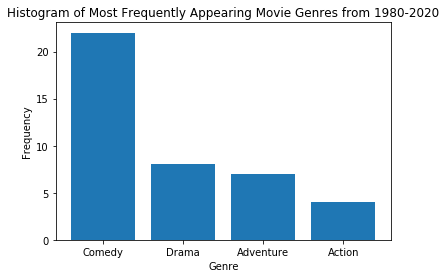

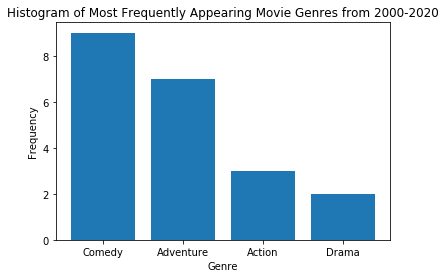

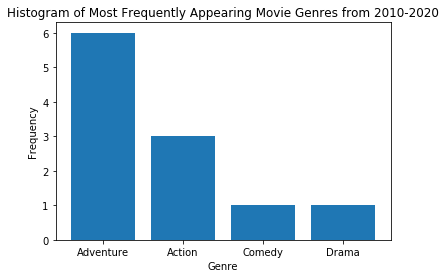

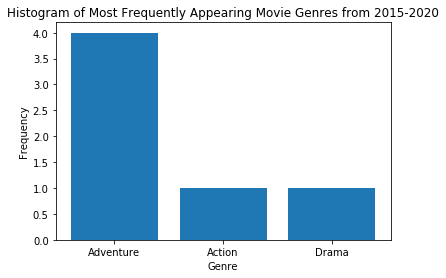

In [416]:
mc1 = movie_df['Most Frequent Genre'].value_counts()
mc2 = movie_df['Most Frequent Genre'][20:].value_counts()
mc3 = movie_df['Most Frequent Genre'][30:].value_counts()
mc4 = movie_df['Most Frequent Genre'][35:].value_counts()

plt.bar(mc1.index,mc1);
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.title('Histogram of Most Frequently Appearing Movie Genres from 1980-2020');
plt.show()

plt.bar(mc2.index,mc2);
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.title('Histogram of Most Frequently Appearing Movie Genres from 2000-2020');
plt.show()

plt.bar(mc3.index,mc3);
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.title('Histogram of Most Frequently Appearing Movie Genres from 2010-2020');
plt.show()

plt.bar(mc4.index,mc4);
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.title('Histogram of Most Frequently Appearing Movie Genres from 2015-2020');
plt.show()

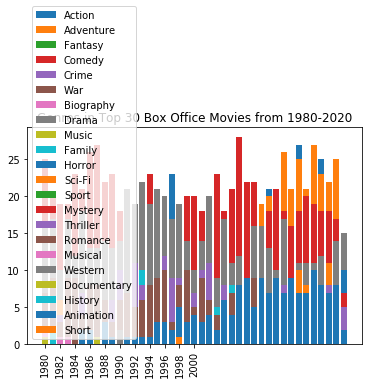

In [370]:
# Plotting all genres over time

years = list(genres.keys())

#genre_plot = ['Action','Drama','Adventure']
#markers = ['-', '--', '-.', ':']

for i in range(len(unique_genres)):
    plt.bar(years,genre_df.loc[unique_genres[i]],ls='-')

plt.xticks(np.arange(0, 21, step=2),rotation = 90)
plt.legend(unique_genres);
plt.title('Genres in Top 30 Box Office Movies from 1980-2020')
plt.show()

# obviously very messy, just plotting to see. maybe we can subplot